In [17]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [1]:
import mlxtend
import numpy as np
import pandas as pd
import re

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset

### Importando o dataset

full dataset outputed by the data understanding

In [3]:
ratingsDF = pd.read_pickle("..\\ProcessedData\\df.pkl")

In [4]:
ratingsDF.head()

,uid,id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,1997-10-01 23:06:30,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,1998-01-04 04:37:51,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,1997-11-10 05:03:55,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,1997-10-10 17:16:33,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("Número de usuários na base %i" % ratingsDF['uid'].nunique())

Número de usuários na base 943


In [6]:
print("Número de filmes na base %i" % ratingsDF['id'].nunique())

Número de filmes na base 1664


### Criando os vetores de features dos filmes

Cada filme será representado pelas notas que cada um dos usuários da base deu para aquele filme. O que siginifica que **cada filme será representado por vetores esparsos de tamanho 943**.

Sabemos da exploração que não há duplicatas para a chave **uid, id**, então:

In [7]:
ratings_id = ratingsDF.groupby(['id']).aggregate({'rating': len})

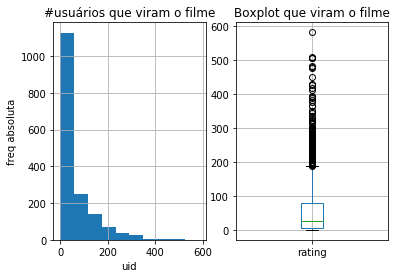

In [8]:
plt.figure(),
plt.subplot(1,2,1)
ratings_id.rating.hist()
plt.grid(True)
plt.title("#usuários que viram o filme")
plt.xlabel("uid")
plt.ylabel("freq absoluta")

plt.subplot(1,2,2)
ratings_id.boxplot()
plt.title("Boxplot que viram o filme")
plt.show()

In [9]:
print("Moda do número de usuários que viram o filme: %i" % ratings_id.rating.mode())

Moda do número de usuários que viram o filme: 1


In [10]:
print("Número de filmes com apenas uma avaliação: %i" % (ratings_id.rating == 1).sum())

Número de filmes com apenas uma avaliação: 135


In [112]:
df_pivoted = pd.pivot_table(ratingsDF, columns=['uid'], values=['rating'], index=['id'], aggfunc=np.max)

In [113]:
# df_pivoted.fillna(0, inplace=True)

In [114]:
df_pivoted.head(5)

rating                                          ...                      \
uid    1    2   3   4    5    6    7   8   9    10  ...   934  935  936 937   
id                                                  ...                       
1      5.0  4.0 NaN NaN  4.0  4.0  NaN NaN NaN  4.0 ...   2.0  3.0  4.0 NaN   
2      3.0  NaN NaN NaN  3.0  NaN  NaN NaN NaN  NaN ...   4.0  NaN  NaN NaN   
3      4.0  NaN NaN NaN  NaN  NaN  NaN NaN NaN  NaN ...   NaN  NaN  4.0 NaN   
4      3.0  NaN NaN NaN  NaN  NaN  5.0 NaN NaN  4.0 ...   5.0  NaN  NaN NaN   
5      3.0  NaN NaN NaN  NaN  NaN  NaN NaN NaN  NaN ...   NaN  NaN  NaN NaN   

                                 
uid  938 939  940  941 942  943  
id                               
1    4.0 NaN  NaN  5.0 NaN  NaN  
2    NaN NaN  NaN  NaN NaN  5.0  
3    NaN NaN  NaN  NaN NaN  NaN  
4    NaN NaN  2.0  NaN NaN  NaN  
5    NaN NaN  NaN  NaN NaN  NaN  

[5 rows x 943 columns]

In [115]:
df_pivoted = pd.DataFrame(df_pivoted.values)

In [116]:
df_pivoted.head(10)

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
1,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,2.0,5.0,3.0,4.0,4.0,...,NaN,NaN,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
8,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,1.0,4.0,5.0,3.0,5.0,3.0,NaN,NaN,3.0
9,3.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Sparse codign

o dataset pode ser codificado de forma esparsa antes do fill de NaN pelas médias, talvez gere ganho

In [117]:
df_pivoted_spase = df_pivoted.to_sparse()

#### Fill de valores nulos

Os algoritimos que vamos utilizar são sensíveis aos valores nulos. Para diminuir esse efeito, podemos substituir zeros pela média das notas dos filmes desconsiderando os valores 0 (que são NAN na verdade);

In [118]:
filmMeanRating = df_pivoted.mean(axis=1)

> Obs: a função fill na por linha não está implementada no Pandas, por isso as transposições

In [125]:
df_pivoted = df_pivoted.T.fillna(filmMeanRating).T

In [126]:
df_pivoted.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0
mean,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
std,0.642041,0.359043,0.372773,0.453487,0.284302,0.212022,0.632690,0.482161,0.586278,0.309907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
25%,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
50%,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
75%,4.000000,3.206107,3.033333,3.550239,3.302326,3.576923,4.000000,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0


### Decomposição do vetor de features

#### PCA

In [127]:
pca_dim = 943

In [128]:
pca = PCA(n_components=pca_dim).fit(df_pivoted)

In [129]:
cumulativeVar = pd.Series(pca.explained_variance_ratio_.cumsum())

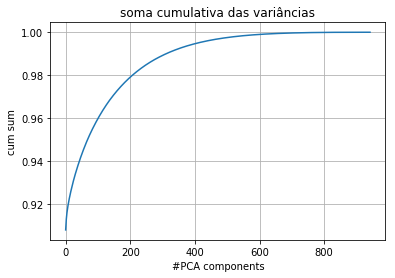

In [130]:
plt.figure(),
cumulativeVar.plot()
plt.grid(True)
plt.title("soma cumulativa das variâncias")
plt.xlabel("#PCA components")
plt.ylabel("cum sum")
plt.show()

a variância ao longo das 5 primeiras dimensões já é da ordem de **e-5**. Se reduzirmos o número de dimensões para apenas 2 temos:

In [133]:
pca_dim = 10
pca = PCA(n_components=pca_dim).fit(df_pivoted)

In [134]:
print("energia conservada pelas duas primeiras componentes do PCA %f" % pca.explained_variance_ratio_.sum()) 

energia conservada pelas duas primeiras componentes do PCA 0.920845


In [135]:
df_pca = pd.DataFrame(pca.transform(df_pivoted))

### Clusterização

Posdemos executar a clusterização no espaço não transformado pelo PCA enquanto isso não gerar problemas de desempenho. Pode-se usar o PCA para fazer a projeção para 2D e faciliar a visualização dos clustes

In [136]:
n_clusters=5

In [146]:
%%time
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pivoted)

Wall time: 1.06 s


In [147]:
#Scaling of data
# ss = StandardScaler()
# ss.fit_transform(df_pivoted_sparse)

clust_labels = kmeans.labels_

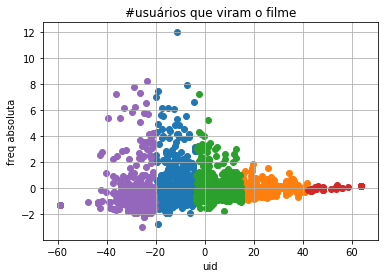

In [148]:
plt.figure(),
for clusterIsx in range(0, n_clusters):
    in_cluster = df_pca.iloc[clust_labels == clusterIsx]
    plt.scatter(in_cluster[0], in_cluster[1])
plt.grid(True)
plt.title("#usuários que viram o filme")
plt.xlabel("uid")
plt.ylabel("freq absoluta")
plt.show()

In [150]:
kmeans.score(df_pivoted)

-158811.0513033277